In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv

import sys
# sys.path.append('/Users/crazycatman/biomolecularmodelling/assignments/dna/pymdna/')
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

joblib is not installed. Falling back to sequential computation.


### Part 1

We are going to make a DNA structure based on a sequence, define a sequence and n_bp and check your input running the cell

In [2]:
def check_input(sequence=None, n_bp=None):

    if sequence is None and n_bp is not None:
        sequence = ''.join(np.random.choice(list('ACGT'), n_bp))
        print('Random sequence:', sequence)

    elif sequence is not None and n_bp is None:
        n_bp = len(sequence)
        print('Sequence:', sequence)
        print('Number of base pairs:', n_bp)

    elif sequence is None and n_bp is None:
        sequence = 'CGCGAATTCGCG'
        n_bp = len(sequence)
        print('Default sequence:', sequence)
        print('Number of base pairs:', n_bp)

    elif sequence is not None and n_bp is not None:
        if n_bp != len(sequence):
            raise ValueError('Sequence length and n_bp do not match')
        print('Sequence:', sequence)
        print('Number of base pairs:', n_bp)
        
    print('Go ahead and run the rest of the code!')
    return sequence, n_bp


sequence = None # Replace this with your sequence
n_bp = None # Replace this with the number of base pairs based on the sequence
sequence, n_bp = check_input(sequence, n_bp)

Default sequence: CGCGAATTCGCG
Number of base pairs: 12
Go ahead and run the rest of the code!


/Users/thor/surfdrive/Projects/pymdna/pymdna/utils.py:84: RuntimeWarning: invalid value encountered in divide
  omega_normalized = np.where(omega_norm != 0, omega / omega_norm, omega)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


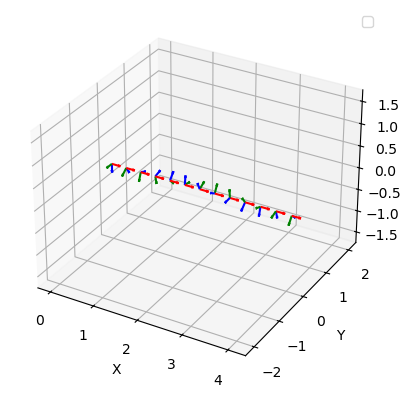

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

In [13]:
# Here we generate the control points for the spline
control_points = mdna.Shapes.line(length=n_bp*0.34)

# Here we generate the spline
spline = mdna.SplineFrames(control_points, twist=True)

# We can now visualize the spline with the frames twisted
spline.plot_frames(equal=True)

In [14]:
# Now we generate the DNA structure, which creates a trajectory object
generator = mdna.StructureGenerator(spline,sequence=sequence)
traj = generator.traj
traj

<mdtraj.Trajectory with 1 frames, 492 atoms, 24 residues, without unitcells at 0x1831e21d0>

In [15]:
view = nv.show_mdtraj(traj)
view

NGLWidget()

In [16]:
# The trajectory object can be visualized using nglview, but if you want to visualize it in VMD, you need to save it to a file
# Saving is also useful if you want to use the structure in other software or scripts
traj.save('your_dna.pdb')

### Part 2

Now we have made a DNA structure we can also mutate the sequence. In princple this also works on pdbs that we have not generated ourselves!

To define mutations you need to fill in the dictionary. A dictionay is similar to a list, but consists of keys and values that are partners: `dict = {key1 : value1, key2 : value2}`. In our case the keys are the residue indices and the values the DNA base we want to exchange. So `mutation = {0 : 'A'}`, gives the instruction to change the first base pair to an Adenine nucleobase. 


Mutate the last basepair and 4 other basepairs of your choosing.

In [ ]:
mutations = {0:'A',1:'C'} # Fill in the muation dictionary 

In [ ]:
# apply the mutations to the DNA
mutant = mdna.Mutate(traj, mutations,complementary=True)
mutant_traj = mutant.mutant_traj

To check if your mutations were succesful determine the sequence of the `mutant_traj`, and name it `mutant_sequence`

In [ ]:
# determine the sequence of the mutant
# anwser:
mutant_sequence = ''.join([res.name[1] for res in mutant_traj.topology.chain(0).residues])

In [ ]:
print('Original sequence:\t',sequence)
print('Mutant sequence:\t',''.join(mutant_sequence))

Original sequence:	 CGCGAATTCGCG
Mutant sequence:	 ACCGAATTCGCG


In [ ]:
mutant.mutant_traj.save('your_mutant_dna.pdb')

### Part 3
Finally we are going to generate a DNA structure that is shaped completely of your choosing! To do so you need to define at least 4 control points, but you can add as many as you want. Control points need to be defined in as cartesian coordinates stored in a numpy array, like `control_points = np.array([[0,0,0],[0,1,0],[0,2,0],[0,3,0]])`, this will generate a linear sequence of DNA in the y-direction. Anything will do except a linearstrand. 

In [ ]:
control_points  = np.array([]) # Replace this with the control points 
control_points = np.array([[0,0,0],[1,5,3],[3,2,3],[1,2,5]])

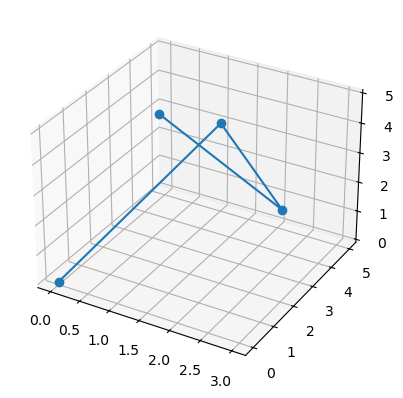

In [ ]:
# plot the control points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(*control_points.T, 'o-')

(45, 3) (46, 3)


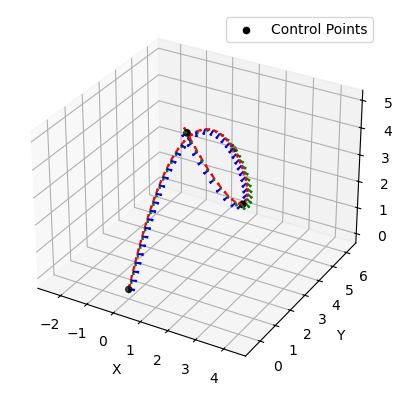

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

In [ ]:
# generate the spline and plot it
spline = mdna.SplineFrames(control_points)
n_bp = spline.frames.shape[0]
spline.plot_frames(equal=True,control_points=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


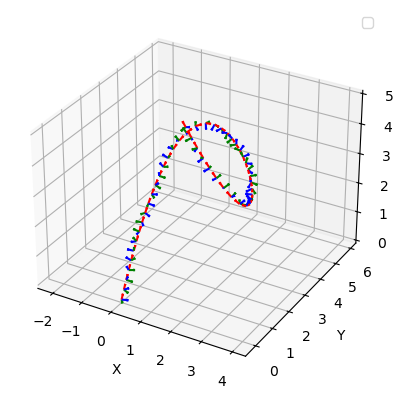

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

In [ ]:
# twist the frames and plot the spline again
spline.twist_frames()
spline.plot_frames(equal=True)

In [ ]:
# Note that if the sequence is provided, the number of base pairs must match the number of frames
# Here a sequence can be provided, otherwise a random sequence will be generated
n_bp = spline.frames.shape[0]
sequence = None 

# Here we generate the DNA structure, which creates a trajectory object
dna = mdna.StructureGenerator(spline,sequence=sequence)
custom_traj = dna.traj
custom_traj

ACCTCCTGTTACAAAATCGGTTCCATTATAAAGGTGCGCGTGCGTA
Nan value found!
[0.00240632        nan 0.00262461 0.00262461        nan 0.00262461
 0.00239509 0.00239509        nan        nan 0.00240632 0.00240632
        nan        nan        nan        nan 0.00262461 0.00505993
        nan 0.00239509        nan 0.00262461        nan 0.00240632
        nan        nan        nan        nan        nan        nan
        nan 0.00264912        nan 0.00239509 0.00239509 0.00505993
 0.00505993 0.00505993 0.00505993 0.00239509 0.00239509 0.00505993
 0.00505993 0.00239509        nan]
++++++++++++++++++++++++
Nan value found!
[0.00240632        nan 0.00262461 0.00262461        nan 0.00262461
 0.00239509 0.00239509        nan        nan 0.00240632 0.00240632
        nan        nan        nan        nan 0.00262461 0.00505993
        nan 0.00239509        nan 0.00262461        nan 0.00240632
        nan        nan        nan        nan        nan        nan
        nan 0.00264912        nan 0.00239509 0.00239509

<mdtraj.Trajectory with 1 frames, 1886 atoms, 92 residues, without unitcells at 0x181a87e10>

In [ ]:
# visualize the DNA structure
view = nv.show_mdtraj(custom_traj)
view.clear()
view.add_representation('ball+stick', selection='all')
view

NGLWidget()

In [ ]:
# Save your custom DNA structure! 
custom_traj.save('your_custom_dna.pdb')